## Time Series

In [3]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Data and Time Data Types and Tools

In [5]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2020, 6, 29)

In [8]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [10]:
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [13]:
stamp = datetime(2011,1,3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [15]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [20]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [21]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [22]:
from datetime import datetime
dates = [datetime(2011,1,2), datetime(2011,1,5),
        datetime(2011,1,7), datetime(2011,1,8),
        datetime(2011,1,10), datetime(2011,1,12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [23]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [25]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [26]:
ts.index.dtype

dtype('<M8[ns]')

In [27]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## Indexing, Selection, Subsetting

In [30]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [31]:
ts['1/10/2011']
ts['20110110']

1.9657805725027142

In [32]:
Ionger_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

Ionger_ts
Ionger_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [33]:
Ionger_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [34]:
ts[datetime(2011,1,7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [36]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [37]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [38]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4),
                      index=dates,
                      columns = ['Colorado', 'Texas',
                                'New York','Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [39]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000',
                          '1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [40]:
dup_ts.index.is_unique

False

In [41]:
dup_ts['1/3/2000']
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [42]:

grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [43]:
ts
resampler = ts.resample('D')

### Generatind Date Range

In [44]:
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [46]:
pd.date_range(start='2012-04-01', periods =20)
pd.date_range(end='2012-06-01', periods =20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('2000-01-01','2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [50]:
pd.date_range('2000-05-02 12:56:31', periods=5)

DatetimeIndex(['2000-05-02 12:56:31', '2000-05-03 12:56:31',
               '2000-05-04 12:56:31', '2000-05-05 12:56:31',
               '2000-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('2000-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2000-05-02', '2000-05-03', '2000-05-04', '2000-05-05',
               '2000-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Data Offsets

In [52]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [53]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [54]:
pd.date_range('2000-01-01','2000-01-03 23:59', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [55]:
Hour(2) + Minute(30)

<150 * Minutes>

In [56]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### week of month dates

In [57]:
rng = pd.date_range('2012-01-01','2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## Shifting(Leading and Lagging) Data

In [58]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

### ts/ts.shift(1) -1

In [59]:
ts.shift(3, freq='M')

2000-04-30   -0.066748
2000-05-31    0.838639
2000-06-30   -0.117388
2000-07-31   -0.517795
Freq: M, dtype: float64

In [60]:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
Freq: M, dtype: float64

### Shifting dates with offsets

In [62]:
from pandas.tseries.offsets import Day, MonthEnd
now =datetime(2011,11,17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [63]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [66]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [67]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [68]:

ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## Time Zone Handing

In [69]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [71]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [73]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.522356
2012-03-10 09:30:00   -0.546348
2012-03-11 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
Freq: D, dtype: float64

In [74]:
print(ts.index.tz)

None


In [75]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [76]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [77]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.522356
2012-03-10 04:30:00-05:00   -0.546348
2012-03-11 05:30:00-04:00   -0.733537
2012-03-12 05:30:00-04:00    1.302736
2012-03-13 05:30:00-04:00    0.022199
2012-03-14 05:30:00-04:00    0.364287
Freq: D, dtype: float64

In [78]:
ts_eastern = ts.tz_localize('America/New_york')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.522356
2012-03-10 15:30:00+01:00   -0.546348
2012-03-11 14:30:00+01:00   -0.733537
2012-03-12 14:30:00+01:00    1.302736
2012-03-13 14:30:00+01:00    0.022199
2012-03-14 14:30:00+01:00    0.364287
Freq: D, dtype: float64

In [79]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone-Aware Timestamp Object

In [84]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [85]:
stamp_moscoq = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscoq

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [86]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [87]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

### oprerations Between Different Timw Zones

In [92]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arthmetic

In [94]:
p = pd.Period(2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [95]:
p + 5
p-2

Period('2005', 'A-DEC')

In [97]:
pd.Period('2014', freq='A-DEC')-p

<7 * YearEnds: month=12>

In [98]:
rng = pd.period_range('2000-01-01','2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [100]:
values = ['2001Q3','2001Q2','2001Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')

### Period Frequency Conversion

In [101]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq ('M',how='start')
p.asfreq ('M',how='end')

Period('2007-12', 'M')

In [102]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M','start')
p.asfreq('M','end')

Period('2007-06', 'M')

In [103]:
p = pd.Period('Aug-2007','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [105]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01    1.634858
2007-01   -1.645693
2008-01   -0.407164
2009-01   -0.252765
Freq: M, dtype: float64

In [106]:
ts.asfreq('B',how='end')

2006-12-29    1.634858
2007-12-31   -1.645693
2008-12-31   -0.407164
2009-12-31   -0.252765
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [107]:
p = pd.Period('2012Q4', freq = 'Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [109]:
p.asfreq('D','start')
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [110]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16*60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [113]:
rng = pd.period_range('2011Q3','2011Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16*60
ts.index= new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
dtype: int32

### Converting Timestamps to Periods(and Backr)

In [115]:
rng = pd.date_range('2000-01-01', periods =3, freq='M')
ts = pd.Series(np.random.randn(3), index = rng)
ts
pts = ts.to_period()
pts

2000-01   -0.894590
2000-02    0.955842
2000-03   -1.653984
Freq: M, dtype: float64

In [117]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')


2000-01    0.362754
2000-01   -1.196146
2000-01    1.636974
2000-02    0.251343
2000-02    1.624623
2000-02   -0.240567
Freq: M, dtype: float64

In [118]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.362754
2000-01-30 23:59:59.999999999   -1.196146
2000-01-31 23:59:59.999999999    1.636974
2000-02-01 23:59:59.999999999    0.251343
2000-02-02 23:59:59.999999999    1.624623
2000-02-03 23:59:59.999999999   -0.240567
Freq: D, dtype: float64

### Creating a PeroiodIndex from Arrays

In [119]:
data = pd.read_csv('./examples/macrodata.csv')
data.head(5)
data.year
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [121]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq = 'Q-DEC')
index
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Freauency Conversion

In [123]:
rng = pd.date_range('2000-01-01', periods =100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01    0.000104
2000-02    0.305668
2000-03    0.152596
2000-04    0.121029
Freq: M, dtype: float64

### Downsampling,

In [124]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [126]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [127]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [128]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [131]:
ts.resample('5min', closed='right',label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### open-high-low-Closed(OHLC) resampling

In [134]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpoloation

In [139]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=  pd.date_range('1/1/2000', periods =2,
                                         freq ='W-WED'),
                    columns =['Colorado','Texas','Yer YOrk','Ohio'])

frame

,Colorado,Texas,Yer YOrk,Ohio
2000-01-05,1.423152,0.840784,-1.478147,0.843503
2000-01-12,-0.338646,0.898593,0.300753,-1.450944


In [140]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,Yer YOrk,Ohio
2000-01-05,1.423152,0.840784,-1.478147,0.843503
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.338646,0.898593,0.300753,-1.450944


In [143]:
frame.resample('D').ffill()

,Colorado,Texas,Yer YOrk,Ohio
2000-01-05,1.423152,0.840784,-1.478147,0.843503
2000-01-06,1.423152,0.840784,-1.478147,0.843503
2000-01-07,1.423152,0.840784,-1.478147,0.843503
2000-01-08,1.423152,0.840784,-1.478147,0.843503
2000-01-09,1.423152,0.840784,-1.478147,0.843503
2000-01-10,1.423152,0.840784,-1.478147,0.843503
2000-01-11,1.423152,0.840784,-1.478147,0.843503
2000-01-12,-0.338646,0.898593,0.300753,-1.450944


In [144]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,Yer YOrk,Ohio
2000-01-05,1.423152,0.840784,-1.478147,0.843503
2000-01-06,1.423152,0.840784,-1.478147,0.843503
2000-01-07,1.423152,0.840784,-1.478147,0.843503
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.338646,0.898593,0.300753,-1.450944


In [145]:
frame.resample('W-THU').ffill()

,Colorado,Texas,Yer YOrk,Ohio
2000-01-06,1.423152,0.840784,-1.478147,0.843503
2000-01-13,-0.338646,0.898593,0.300753,-1.450944


### Resampling with Periods

In [147]:
frame = pd.DataFrame(np.random.randn(24,4),
                    index = pd.period_range('1-2000','12-2001',
                                           freq='M'),
                    columns = ['Colorado','Texas', 'New York', ' Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.411759,-0.240939,0.447973,0.241863
2001,0.161656,-0.405233,0.013699,0.440707


In [149]:
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.411759,-0.240939,0.447973,0.241863
2001Q1,-0.411759,-0.240939,0.447973,0.241863
2001Q2,-0.411759,-0.240939,0.447973,0.241863
2001Q3,-0.411759,-0.240939,0.447973,0.241863
2001Q4,0.161656,-0.405233,0.013699,0.440707


In [150]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.411759,-0.240939,0.447973,0.241863
2001Q1,-0.411759,-0.240939,0.447973,0.241863
2001Q2,-0.411759,-0.240939,0.447973,0.241863
2001Q3,-0.411759,-0.240939,0.447973,0.241863
2001Q4,0.161656,-0.405233,0.013699,0.440707
2002Q1,0.161656,-0.405233,0.013699,0.440707
2002Q2,0.161656,-0.405233,0.013699,0.440707
2002Q3,0.161656,-0.405233,0.013699,0.440707


## Moving Window Function

In [152]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

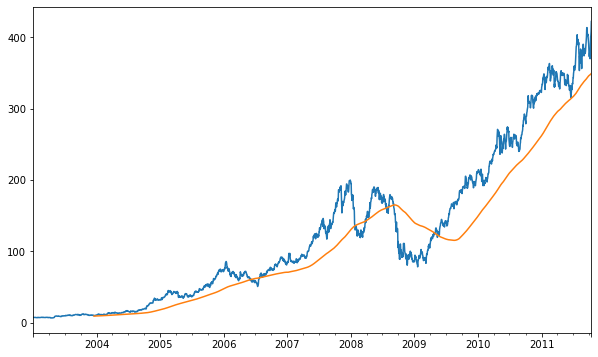

In [154]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [155]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

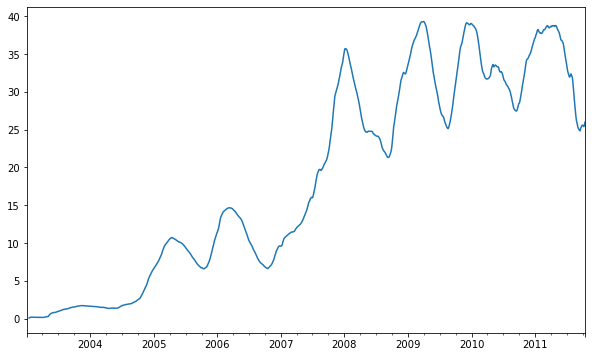

In [156]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [158]:
expanding_mean = appl_std250.expanding().mean()

In [159]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

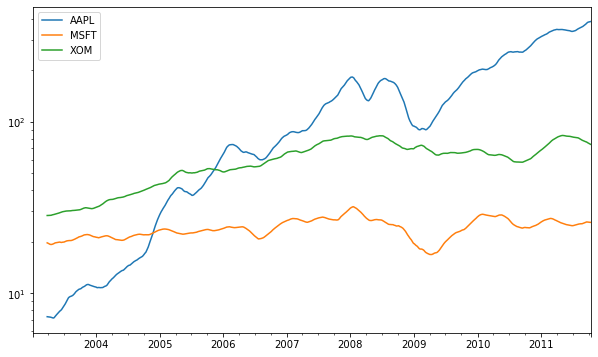

In [160]:
close_px.rolling(60).mean().plot(logy=True)

In [162]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [163]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

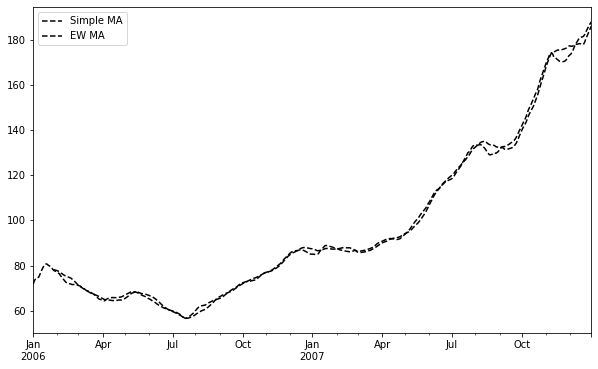

In [164]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods =20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k--', label="EW MA")
plt.legend()

### Binary Moving Window Functions

In [166]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [168]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [169]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

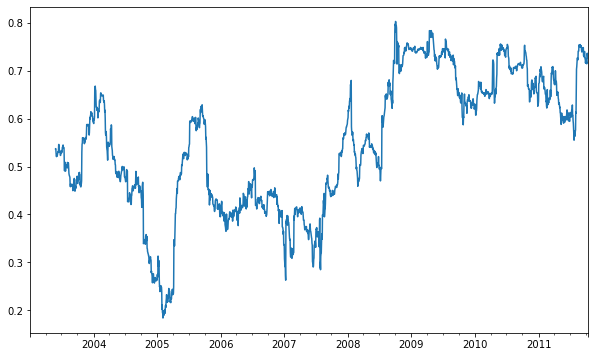

In [170]:
corr.plot()

In [171]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

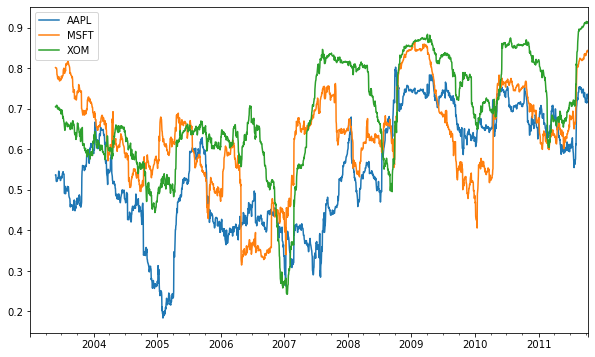

In [172]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User_Defined Moving Window Functions

In [173]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

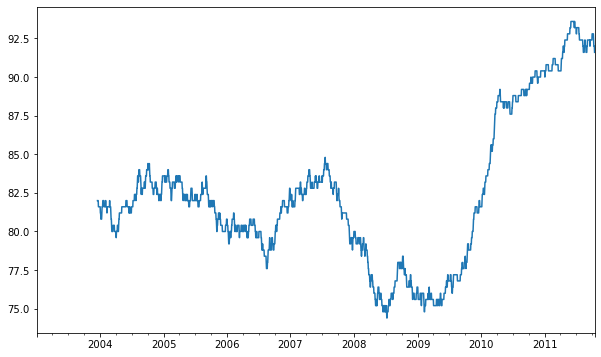

In [174]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [175]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS